In [3]:
#Importar librerias necesarias
#%pip install funpymodeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.4 MB/s 

In [4]:
#Carga desde un archivo .csv sin indice y eliminar filas innecesarias
Madrid=pd.read_csv("Listings Final-Madrid.csv")
Madrid.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1104967621421098322,https://www.airbnb.com/rooms/1104967621421098322,20240615011404,2024-06-15,city scrape,"Habitación de lujo, baño privado",NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,565307927,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.61
1,930941073152690361,https://www.airbnb.com/rooms/930941073152690361,20240615011404,2024-06-15,city scrape,habitación para pareja,Rent room for loose nights or weekends to a c...,NaN,https://a0.muscache.com/pictures/85f0b383-e8f8...,442944608,...,5.00,4.67,5.00,NaN,f,2,0,2,0,0.28
2,51647382,https://www.airbnb.com/rooms/51647382,20240615011404,2024-06-15,city scrape,Buenos Aires en Madrid,"This special place is close to everything, mak...",The neighborhood is m,https://a0.muscache.com/pictures/db018af4-f622...,252336445,...,4.83,4.51,4.61,NaN,t,2,0,2,0,5.40
3,1026072412626070839,https://www.airbnb.com/rooms/1026072412626070839,20240615011404,2024-06-15,city scrape,Habitación Madrid Rio!,Enjoy the simplicity of this quiet and central...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,545435841,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.14
4,766423030884644417,https://www.airbnb.com/rooms/766423030884644417,20240615011404,2024-06-15,city scrape,habitación para turista,Enjoy a stylish experience at this centrally-l...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3882456,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


In [5]:
#Identificar valores nulos por columna
# Ajustar maximo de filas
Valores_Nulos=Madrid.isnull().sum()
Columnas_Con_Nulos = Valores_Nulos[Valores_Nulos > 0]
Columnas_Con_Nulos

,0
description,966
neighborhood_overview,13618
picture_url,2
host_name,4
host_since,4
host_location,8416
host_about,13945
host_response_time,4915
host_response_rate,4915
host_acceptance_rate,4017


In [6]:
#Información tipos de columnas
Tipos_Columnas = Madrid[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'object']
Columnas_Object

,0
description,object
neighborhood_overview,object
picture_url,object
host_name,object
host_since,object
host_location,object
host_about,object
host_response_time,object
host_response_rate,object
host_acceptance_rate,object


In [7]:
#Información tipos de columnas
Tipos_Columnas = Madrid[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'float']
Columnas_Object

,0
host_listings_count,float64
host_total_listings_count,float64
bathrooms,float64
bedrooms,float64
beds,float64
calendar_updated,float64
review_scores_rating,float64
review_scores_accuracy,float64
review_scores_cleanliness,float64
review_scores_checkin,float64


In [8]:
#Realizamos una copia del dataframe
copia_Madrid = Madrid.copy()

In [9]:
#Cuarto método de sustitución de valores nulos
#Sustituir valores nulos por un string en  concreto
copia_Madrid["description"] = copia_Madrid["description"].fillna("DESCRIPCIÓN FALTANTE")
copia_Madrid["neighborhood_overview"] = copia_Madrid["neighborhood_overview"].fillna("SIN INFORMACIÓN")
copia_Madrid["picture_url"] = copia_Madrid["picture_url"].fillna("SIN IMAGEN")
copia_Madrid["host_name"] = copia_Madrid["host_name"].fillna("ANONIMO")
copia_Madrid["host_since"] = copia_Madrid["host_since"].fillna("SIN FECHA")
copia_Madrid["host_location"] = copia_Madrid["host_location"].fillna("SIN INFORMACIÓN")
copia_Madrid["host_about"] = copia_Madrid["host_about"].fillna("SIN INFORMACIÓN")
copia_Madrid["host_response_time"] = copia_Madrid["host_response_time"].fillna("SIN INFORMACIÓN")
copia_Madrid["host_response_rate"] = copia_Madrid["host_response_rate"].fillna("SIN INFORMACIÓN")
copia_Madrid["host_acceptance_rate"] = copia_Madrid["host_acceptance_rate"].fillna("SIN INFORMACIÓN")
copia_Madrid["host_is_superhost"] = copia_Madrid["host_is_superhost"].fillna("VALIDACIÓN PENDIENTE")
copia_Madrid["host_thumbnail_url"] = copia_Madrid["host_thumbnail_url"].fillna("MINIATURA NO DISPONIBLE")
copia_Madrid["host_picture_url"] = copia_Madrid["host_picture_url"].fillna("SIN IMAGEN")
copia_Madrid["host_neighbourhood"] = copia_Madrid["host_neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Madrid["host_verifications"] = copia_Madrid["host_verifications"].fillna("VALIDACIÓN PENDIENTE")
copia_Madrid["host_has_profile_pic"] = copia_Madrid["host_has_profile_pic"].fillna("INFORMACIÓN FALTANTE")
copia_Madrid["host_identity_verified"] = copia_Madrid["host_identity_verified"].fillna("INFORMACIÓN FALTANTE")
copia_Madrid["neighbourhood"] = copia_Madrid["neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Madrid["bathrooms_text"] = copia_Madrid["bathrooms_text"].fillna("SIN INFORMACIÓN")
copia_Madrid["price"] = copia_Madrid["price"].fillna("NO DEFINIDO")
copia_Madrid["has_availability"] = copia_Madrid["has_availability"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Madrid["first_review"] = copia_Madrid["first_review"].fillna("SIN RESEÑA")
copia_Madrid["last_review"] = copia_Madrid["last_review"].fillna("SIN RESEÑA")
copia_Madrid["license"] = copia_Madrid["license"].fillna("SIN LICENCIA")

In [10]:
#Primer método de sustitución de valores nulos
#Sustituir valores nulos con promedio o media
copia_Madrid["review_scores_rating"]=copia_Madrid["review_scores_rating"].fillna(round(copia_Madrid ['review_scores_rating'].mean(),1))
copia_Madrid["review_scores_accuracy"]=copia_Madrid["review_scores_accuracy"].fillna(round(copia_Madrid ['review_scores_accuracy'].mean(),1))
copia_Madrid["review_scores_cleanliness"]=copia_Madrid["review_scores_cleanliness"].fillna(round(copia_Madrid ['review_scores_cleanliness'].mean(),1))
copia_Madrid["review_scores_checkin"]=copia_Madrid["review_scores_checkin"].fillna(round(copia_Madrid ['review_scores_checkin'].mean(),1))
copia_Madrid["review_scores_communication"]=copia_Madrid["review_scores_communication"].fillna(round(copia_Madrid ['review_scores_communication'].mean(),1))
copia_Madrid["review_scores_location"]=copia_Madrid["review_scores_location"].fillna(round(copia_Madrid ['review_scores_location'].mean(),1))
copia_Madrid["review_scores_value"]=copia_Madrid["review_scores_value"].fillna(round(copia_Madrid ['review_scores_value'].mean(),1))
copia_Madrid["reviews_per_month"]=copia_Madrid["reviews_per_month"].fillna(round(copia_Madrid ['reviews_per_month'].mean(),1))
copia_Madrid["host_listings_count"]=copia_Madrid["host_listings_count"].fillna(round(copia_Madrid ['host_listings_count'].mean(),1))
copia_Madrid["host_total_listings_count"]=copia_Madrid["host_total_listings_count"].fillna(round(copia_Madrid ['host_total_listings_count'].mean(),1))
copia_Madrid["bathrooms"]=copia_Madrid["bathrooms"].fillna(round(copia_Madrid ['bathrooms'].mean(),1))
copia_Madrid["beds"]=copia_Madrid["beds"].fillna(round(copia_Madrid ['beds'].mean(),1))



In [47]:
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en  concreto
copia_Madrid["bedrooms"]=copia_Madrid["bedrooms"].fillna(0)
copia_Madrid["calendar_updated"]=copia_Madrid["calendar_updated"].fillna("-")

In [12]:
#Corroboramos valores nulos
# Ajustar maximo de filas
valores_nulos=copia_Madrid.isnull().sum()
valores_nulos

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [13]:
#Seleccionar variables relevantes
Madrid_variables = copia_Madrid[['listing_url', 'last_scraped', 'source', 'name', 'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']]

In [14]:
Madrid_variables.head()

,listing_url,last_scraped,source,name,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,...,bedrooms,beds,amenities,price,has_availability,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,https://www.airbnb.com/rooms/1104967621421098322,2024-06-15,city scrape,"Habitación de lujo, baño privado",https://www.airbnb.com/users/show/565307927,Carolina,2024-03-04,"Madrid, Spain",within an hour,100%,...,1.0,0.0,[],$68.00,t,2,4.50,f,1,0.61
1,https://www.airbnb.com/rooms/930941073152690361,2024-06-15,city scrape,habitación para pareja,https://www.airbnb.com/users/show/442944608,Jonathan Jesus,2022-01-31,"Madrid, Spain",a few days or more,0%,...,1.0,1.0,"[""Wifi""]",$16.00,t,3,5.00,f,2,0.28
2,https://www.airbnb.com/rooms/51647382,2024-06-15,city scrape,Buenos Aires en Madrid,https://www.airbnb.com/users/show/252336445,Norma,2019-03-31,"Madrid, Spain",within an hour,100%,...,2.0,3.0,"[""Outdoor dining area"", ""TV"", ""Free parking on...",$25.00,t,186,4.67,t,2,5.40
3,https://www.airbnb.com/rooms/1026072412626070839,2024-06-15,city scrape,Habitación Madrid Rio!,https://www.airbnb.com/users/show/545435841,Gean Piero,2023-11-07,SIN INFORMACIÓN,SIN INFORMACIÓN,SIN INFORMACIÓN,...,1.0,2.0,"[""Lock on bedroom door"", ""Wifi"", ""Kitchen""]",$26.00,t,1,5.00,f,1,0.14
4,https://www.airbnb.com/rooms/766423030884644417,2024-06-15,city scrape,habitación para turista,https://www.airbnb.com/users/show/3882456,Gabriela CHÁVEZ,2012-10-15,"Madrid, Spain",SIN INFORMACIÓN,SIN INFORMACIÓN,...,1.0,1.0,"[""Washer"", ""Lock on bedroom door"", ""Air condit...",$100.00,t,0,4.70,f,1,1.90


ELIMINAR OUTLIERS POR DESVIACION ESTANDAR

In [15]:
Madrid_variables.dtypes

,0
listing_url,object
last_scraped,object
source,object
name,object
host_url,object
host_name,object
host_since,object
host_location,object
host_response_time,object
host_response_rate,object


In [16]:
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = Madrid_variables.select_dtypes(include = 'object')
columnas_cuantitativas = Madrid_variables.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

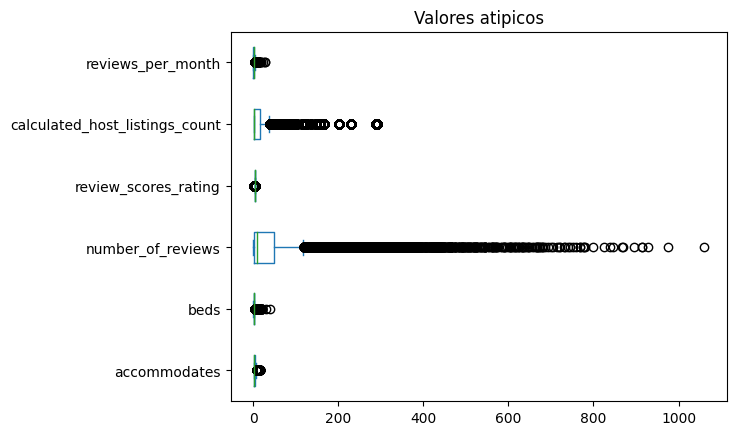

In [17]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [18]:
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido accommodates                        8.873245
beds                                6.008475
number_of_reviews                 294.833157
review_scores_rating                5.817323
calculated_host_listings_count    214.009952
reviews_per_month                   7.090891
dtype: float64
Limite inferior permitido accommodates                       -2.638808
beds                               -2.427417
number_of_reviews                -206.436931
review_scores_rating                3.527078
calculated_host_listings_count   -158.844450
reviews_per_month                  -3.303818
dtype: float64


In [19]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [20]:
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

,0
accommodates,377
beds,271
number_of_reviews,674
review_scores_rating,488
calculated_host_listings_count,1099
reviews_per_month,486


In [21]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

In [22]:
#Se juntan las columnas cualitativas con las cuantitativas
Madrid_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
Madrid_outliers.head()

,accommodates,beds,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month,listing_url,last_scraped,source,name,...,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,amenities,price,has_availability,instant_bookable
0,2.0,0.0,2.0,4.50,1.0,0.61,https://www.airbnb.com/rooms/1104967621421098322,2024-06-15,city scrape,"Habitación de lujo, baño privado",...,t,Pacífico,Private room in rental unit,Private room,1 bath,1.0,[],$68.00,t,f
1,2.0,1.0,3.0,5.00,2.0,0.28,https://www.airbnb.com/rooms/930941073152690361,2024-06-15,city scrape,habitación para pareja,...,t,San Diego,Private room in rental unit,Private room,1 bath,1.0,"[""Wifi""]",$16.00,t,f
2,1.0,3.0,186.0,4.67,2.0,5.40,https://www.airbnb.com/rooms/51647382,2024-06-15,city scrape,Buenos Aires en Madrid,...,t,San Diego,Private room in home,Private room,1 shared bath,2.0,"[""Outdoor dining area"", ""TV"", ""Free parking on...",$25.00,t,t
3,3.0,2.0,1.0,5.00,1.0,0.14,https://www.airbnb.com/rooms/1026072412626070839,2024-06-15,city scrape,Habitación Madrid Rio!,...,t,Opañel,Private room in rental unit,Private room,1 shared bath,1.0,"[""Lock on bedroom door"", ""Wifi"", ""Kitchen""]",$26.00,t,f
4,1.0,1.0,0.0,4.70,1.0,1.90,https://www.airbnb.com/rooms/766423030884644417,2024-06-15,city scrape,habitación para turista,...,t,Lista,Private room in rental unit,Private room,1 shared bath,1.0,"[""Washer"", ""Lock on bedroom door"", ""Air condit...",$100.00,t,f


In [23]:
#Comprobamos que no existan valores nulos
valores_nulos_Madrid_outliers = Madrid_outliers.isnull().sum()
valores_nulos_Madrid_outliers

,0
accommodates,0
beds,0
number_of_reviews,0
review_scores_rating,0
calculated_host_listings_count,0
reviews_per_month,0
listing_url,0
last_scraped,0
source,0
name,0


Realizar la extracción de características de las siguientes columnas categóricas: (host_response_time, host_acceptance_rate, property_type, room_type, amenities y host_is_superhost)

In [24]:
#Extraer características de análisis univariado y generar tabla de frecuencias
freq_tbl(Madrid_outliers)
Madrid_outliers.dtypes

                                            listing_url  frequency  \
0      https://www.airbnb.com/rooms/1104967621421098322          1   
1                  https://www.airbnb.com/rooms/6168837          1   
2       https://www.airbnb.com/rooms/975802602466298304          1   
3                 https://www.airbnb.com/rooms/40192799          1   
4      https://www.airbnb.com/rooms/1171113912778884584          1   
...                                                 ...        ...   
26919  https://www.airbnb.com/rooms/1164490127521864734          1   
26920   https://www.airbnb.com/rooms/680887042864576850          1   
26921   https://www.airbnb.com/rooms/974038476122780036          1   
26922   https://www.airbnb.com/rooms/645352260145108648          1   
26923   https://www.airbnb.com/rooms/655448045703760486          1   

       percentage  cumulative_perc  
0        0.000037         0.000037  
1        0.000037         0.000074  
2        0.000037         0.000111  
3        0.

,0
accommodates,float64
beds,float64
number_of_reviews,float64
review_scores_rating,float64
calculated_host_listings_count,float64
reviews_per_month,float64
listing_url,object
last_scraped,object
source,object
name,object


Text(0.5, 1.0, 'Grupo de vecindario')

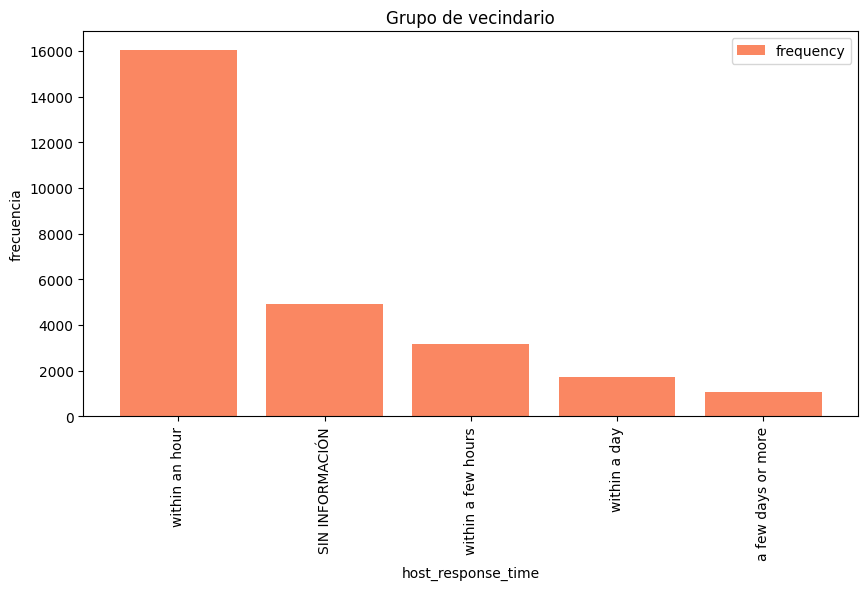

In [ ]:
tabla1=freq_tbl(Madrid_outliers["host_response_time"])
filtro1=tabla1[tabla1["frequency"]>1]
filtro1_index=filtro1.set_index("host_response_time")
filtro1_index_freq=filtro1_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro1_index_freq.plot(kind="bar", width=.8, figsize=(10,5), color="#fa8762")
plt.ylabel("frecuencia")
plt.title("Tiempo de respuesta del host")

Text(0.5, 1.0, 'índice de aceptación de anfitriones')

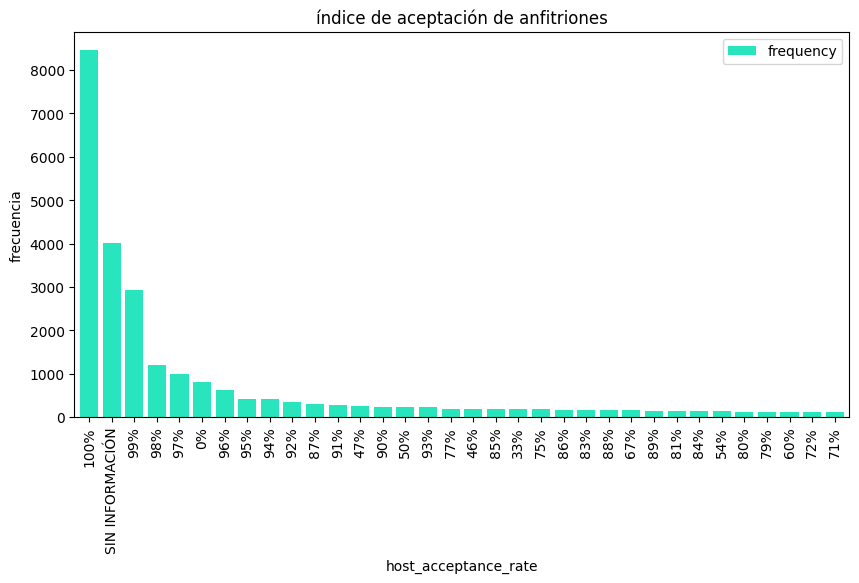

In [ ]:
tabla2=freq_tbl(Madrid_outliers["host_acceptance_rate"])
filtro2=tabla2[tabla2["frequency"]>100]
filtro2_index=filtro2.set_index("host_acceptance_rate")
filtro2_index_freq=filtro2_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro2_index_freq.plot(kind="bar", width=.8, figsize=(10,5), color="#28e5bd")
plt.ylabel("frecuencia")
plt.title("índice de aceptación de anfitriones")

Text(0.5, 1.0, 'Tipo de propiedad')

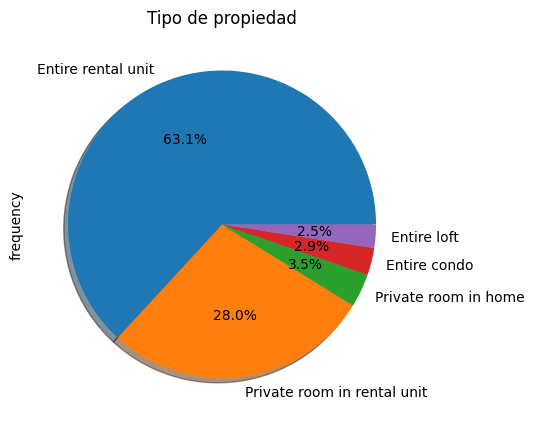

In [ ]:
tabla3=freq_tbl(Madrid_outliers["property_type"])
filtro3=tabla3[tabla3["frequency"]>400]
filtro3_index=filtro3.set_index("property_type")
filtro3_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Tipo de propiedad")

Text(0.5, 1.0, 'Tipo de cuarto')

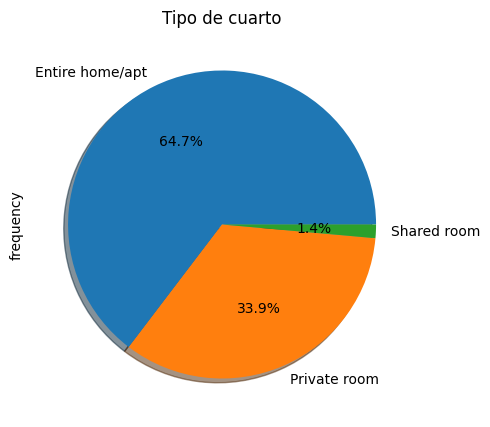

In [ ]:
tabla4=freq_tbl(Madrid_outliers["room_type"])
filtro4=tabla4[tabla4["frequency"]>300]
filtro4_index=filtro4.set_index("room_type")
filtro4_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Tipo de cuarto")

Text(0.5, 1.0, 'Amenidades')

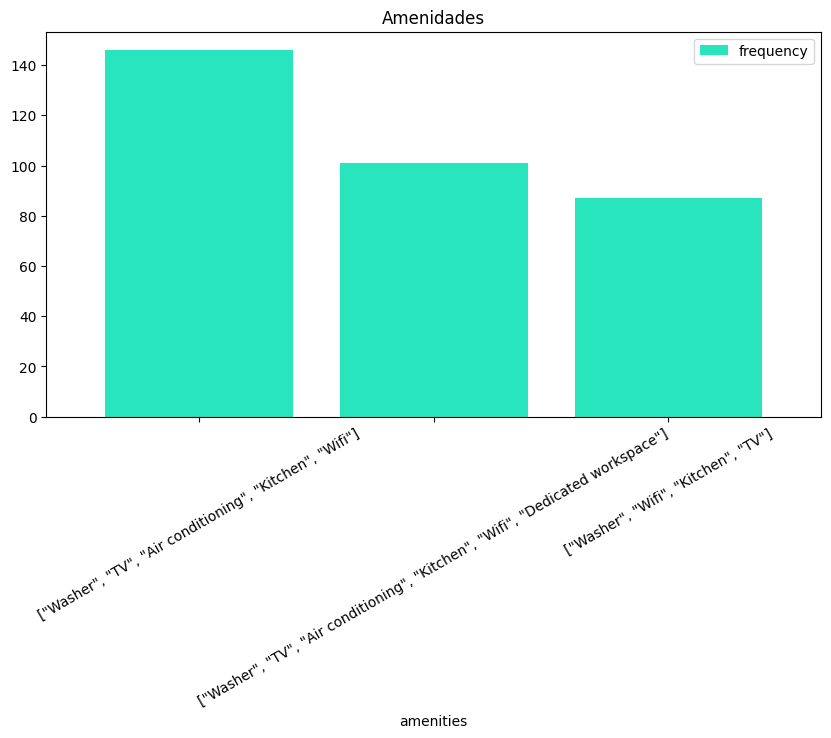

In [ ]:
tabla5=freq_tbl(Madrid_outliers["amenities"])
filtro5 = tabla5[(tabla5["frequency"] > 70) & (tabla5["frequency"] < 5000)]
filtro5_index=filtro5.set_index("amenities")
filtro5_index_freq=filtro5_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro5_index_freq.plot(kind="bar", width=.8, figsize=(10,5), color="#28e5bd")
plt.xticks(rotation=30)
plt.title("Amenidades")

Text(0.5, 1.0, 'El host es superhost')

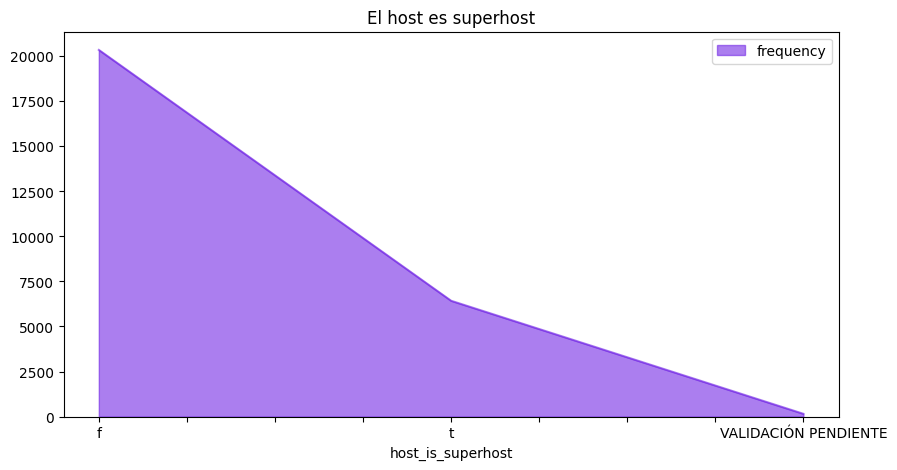

In [ ]:
tabla6=freq_tbl(Madrid_outliers["host_is_superhost"])
filtro6=tabla6[tabla6["frequency"]>1]
filtro6_index=filtro6.set_index("host_is_superhost")
filtro6_index_freq=filtro6_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro6_index_freq.plot(kind="area", figsize=(10,5), alpha=.6, color="#7328e5")
plt.title("El host es superhost")

Correlación

In [25]:
#Encontramos todas las correlaciones entre las variables y convertimos a valor absoluto
Corr_Factors=columnas_cuantitativas_limpio.corr()
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,accommodates,beds,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
accommodates,1.000000,0.589970,0.123494,0.063515,0.066480,0.080605
beds,0.589970,1.000000,0.102294,0.046605,0.048887,0.027370
number_of_reviews,0.123494,0.102294,1.000000,0.032664,0.079684,0.358008
review_scores_rating,0.063515,0.046605,0.032664,1.000000,0.094880,0.028899
calculated_host_listings_count,0.066480,0.048887,0.079684,0.094880,1.000000,0.020297
reviews_per_month,0.080605,0.027370,0.358008,0.028899,0.020297,1.000000


<Axes: >

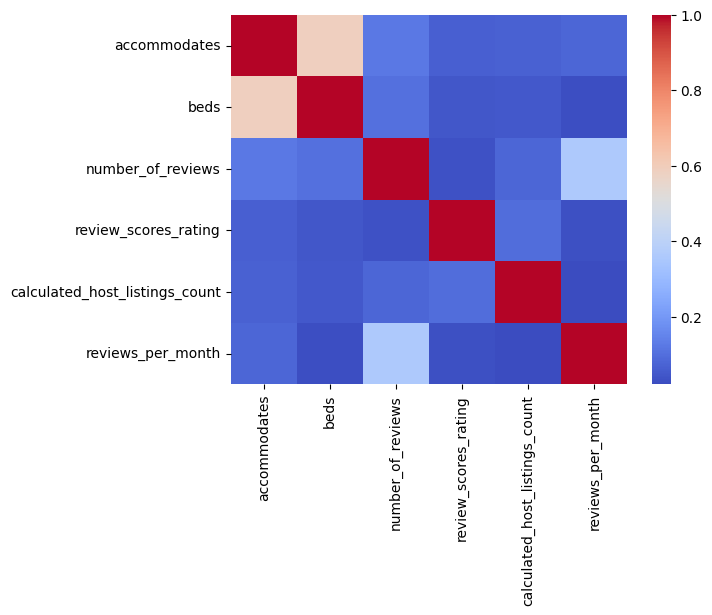

In [26]:
#Mapa de calor
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')
Heat_Map

Modelo 1

In [27]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= columnas_cuantitativas_limpio[['beds']]
Var_Dep= columnas_cuantitativas_limpio['accommodates']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [28]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['beds'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.86069684]),
 'rank_': 1,
 'singular_': array([185.33789423]),
 'intercept_': 1.5288520418085965}

0.5899704077276067

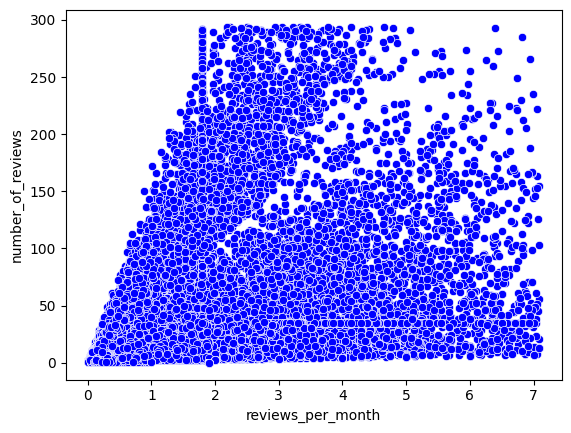

In [29]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='reviews_per_month', y='number_of_reviews', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

Modelo 2

In [32]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep2= columnas_cuantitativas_limpio[['reviews_per_month']]
Var_Dep2= columnas_cuantitativas_limpio['number_of_reviews']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [34]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Var_Dep2)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([13.8898521]),
 'rank_': 1,
 'singular_': array([232.20300257]),
 'intercept_': 10.099852197917823}

0.3580078339325857

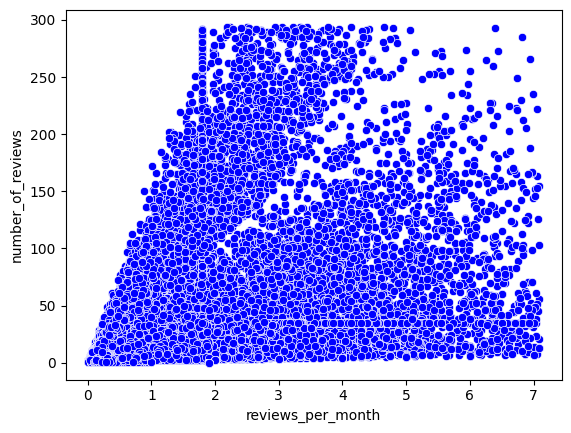

In [35]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='reviews_per_month', y='number_of_reviews', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

Modelo 3

In [36]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep3= columnas_cuantitativas_limpio[['number_of_reviews']]
Var_Dep3= columnas_cuantitativas_limpio['beds']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [37]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Var_Dep3)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00210446]),
 'rank_': 1,
 'singular_': array([9008.92398531]),
 'intercept_': 1.6409536450763187}

0.10229375928412253

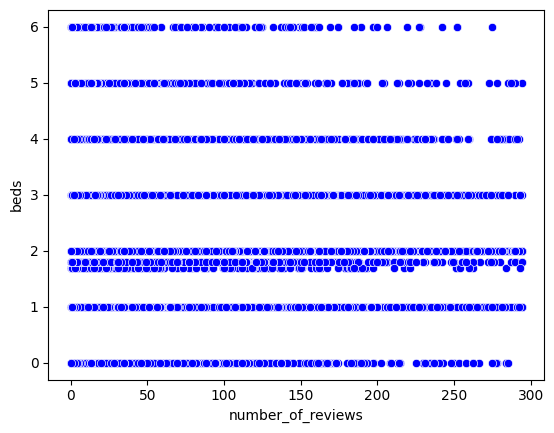

In [38]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='number_of_reviews', y='beds', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

Regresión multiple

In [39]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepM= columnas_cuantitativas_limpio[["beds","number_of_reviews",	"review_scores_rating","calculated_host_listings_count",	"reviews_per_month"]]
Var_DepM= columnas_cuantitativas_limpio['accommodates']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelM= LinearRegression()

In [40]:
#Ajustamos el modelo con las variables antes declaradas
modelM.fit(X=Vars_IndepM, y=Var_DepM)

modelM.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['beds', 'number_of_reviews', 'review_scores_rating',
        'calculated_host_listings_count', 'reviews_per_month'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 0.85323365,  0.00112654, -0.24418653,  0.00187131,  0.09899651]),
 'rank_': 5,
 'singular_': array([9027.82354448, 5629.80905212,  218.09125454,  182.53207266,
          39.86912191]),
 'intercept_': 2.446046860942698}

In [41]:
coef_DeterM=modelM.score(X=Vars_IndepM, y=Var_DepM)
coef_CorrelM=np.sqrt(coef_DeterM)
coef_CorrelM

0.601198580010359

<Axes: xlabel='beds', ylabel='accommodates'>

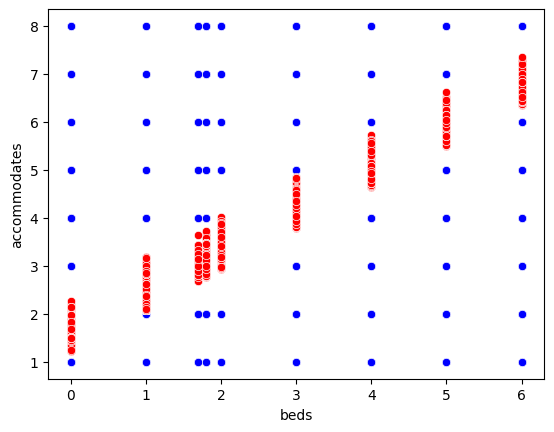

In [46]:
#Modelo predictivo
y_pred= modelM.predict(X=columnas_cuantitativas_limpio[["beds","number_of_reviews",	"review_scores_rating","calculated_host_listings_count",	"reviews_per_month"]])
#columnas_cuantitativas_limpio.insert(0, 'Predicciones', y_pred)

sns.scatterplot(x='beds', y='accommodates', color="blue", data=columnas_cuantitativas_limpio)
sns.scatterplot(x='beds', y='Predicciones', color="red", data=columnas_cuantitativas_limpio)